<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/EjercicioClaseReguladores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [13]:
%tensorflow_version 2.x
from keras.datasets import mnist 
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
#from keras import optimazers
#from keras.losses import sparse_categorical_crossentropy

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Descarga los datos de MNIST

In [15]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255
print('Imágenes de entrenamiento:', train_images.shape)
print('Imágenes de test:', test_images.shape)

Imágenes de entrenamiento: (60000, 784)
Imágenes de test: (10000, 784)


In [16]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images=train_images[50000:]
validation_labels=train_labels[50000:]
train_images=train_images[:49999]
train_labels=train_labels[:49999]
print('Comprobación:', validation_images.shape)
print('Comprobación:', validation_labels.shape)


Comprobación: (10000, 784)
Comprobación: (10000,)


In [17]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:

  modelo = models.Sequential()
  if regularizador==0:
    modelo.add(layers.Dense(512, activation ='relu', input_shape=(28*28,)))
    modelo.add(layers.Dense(10,  activation = 'softmax'))
  elif regularizador==1:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation ='relu', input_shape=(28*28,)))
    modelo.add(layers.Dense(10,  activation = 'softmax'))
  elif regularizador==2:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation ='relu', input_shape=(28*28,)))
    modelo.add(layers.Dense(10,  activation = 'softmax'))
  elif regularizador==3:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation ='relu', input_shape=(28*28,)))
    modelo.add(layers.Dense(10,  activation = 'softmax'))
  elif regularizador==4:
    modelo.add(layers.Dense(512, activation ='relu', input_shape=(28*28,)))
    modelo.add(layers.Dropout(0.5))
    modelo.add(layers.Dense(10,  activation = 'softmax', input_shape=(28*28,)))
  else:
    print("Error")
  modelo.summary()
  return modelo
  
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

In [18]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo

  modelo.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
  return modelo

In [19]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

  historia = modelo.fit(train_images, train_labels,
                    batch_size = 128,
                    epochs = 30,
                    validation_data=(validation_images, validation_labels))
  return historia

In [20]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [21]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [22]:
network0 = crea_modelo(0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
network0 = compila_modelo(network0)

In [24]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2776 - accuracy: 0.9195 - val_loss: 0.1399 - val_accuracy: 0.9589
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1159 - accuracy: 0.9658 - val_loss: 0.1105 - val_accuracy: 0.9696
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0757 - accuracy: 0.9774 - val_loss: 0.0844 - val_accuracy: 0.9754
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0545 - accuracy: 0.9838 - val_loss: 0.0831 - val_accuracy: 0.9742
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.0716 - val_accuracy: 0.9796
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0741 - val_accuracy: 0.9791
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0805 - val_accuracy: 0.9794
Epoch 

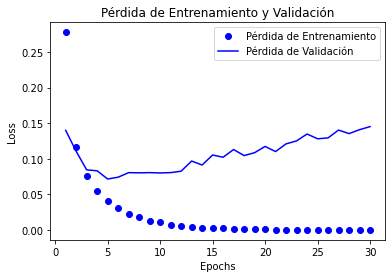

In [25]:
pinta_perdida_entrenamiento_validacion(historia0)

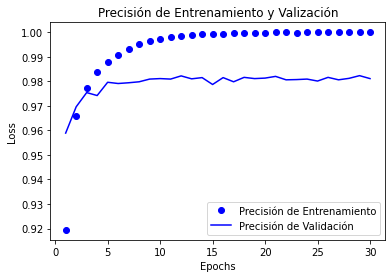

In [26]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [27]:
network1 = crea_modelo(1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
network1 = compila_modelo(network1)

In [29]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1503 - accuracy: 0.8425 - val_loss: 1.0102 - val_accuracy: 0.8792
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9745 - accuracy: 0.8746 - val_loss: 0.9644 - val_accuracy: 0.8757
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8539 - accuracy: 0.8974 - val_loss: 0.7687 - val_accuracy: 0.9214
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7801 - accuracy: 0.9086 - val_loss: 0.7385 - val_accuracy: 0.9275
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7261 - accuracy: 0.9208 - val_loss: 0.7124 - val_accuracy: 0.9270
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6873 - accuracy: 0.9271 - val_loss: 0.6467 - val_accuracy: 0.9396
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6580 - accuracy: 0.9314 - val_loss: 0.6283 - val_accuracy: 0.9401
Epoch 

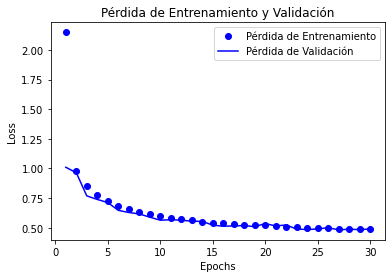

In [30]:
pinta_perdida_entrenamiento_validacion(historia1)

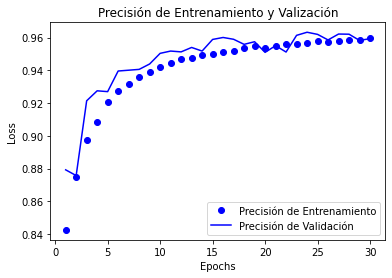

In [31]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [32]:
network2 = crea_modelo(2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
network2 = compila_modelo(network2)

In [34]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5257 - accuracy: 0.9126 - val_loss: 0.2917 - val_accuracy: 0.9570
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2641 - accuracy: 0.9540 - val_loss: 0.2191 - val_accuracy: 0.9638
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2111 - accuracy: 0.9625 - val_loss: 0.1823 - val_accuracy: 0.9712
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1877 - accuracy: 0.9668 - val_loss: 0.1819 - val_accuracy: 0.9690
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1738 - accuracy: 0.9693 - val_loss: 0.1688 - val_accuracy: 0.9711
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1642 - accuracy: 0.9719 - val_loss: 0.1625 - val_accuracy: 0.9704
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1581 - accuracy: 0.9725 - val_loss: 0.1509 - val_accuracy: 0.9759
Epoch 

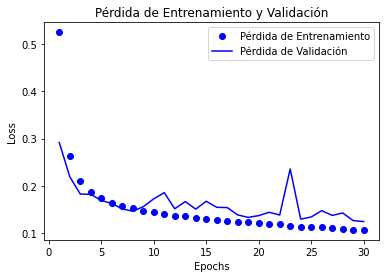

In [35]:
pinta_perdida_entrenamiento_validacion(historia2)

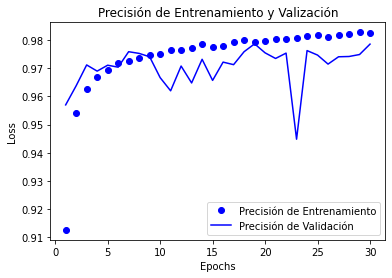

In [36]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [37]:
network3 = crea_modelo(3)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
network3 = compila_modelo(network3)

In [39]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1511 - accuracy: 0.8406 - val_loss: 1.0502 - val_accuracy: 0.8755
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9821 - accuracy: 0.8774 - val_loss: 0.9394 - val_accuracy: 0.8782
Epoch 3/30
391/391 [==============================] - 3s 7ms/step - loss: 0.8600 - accuracy: 0.8982 - val_loss: 0.7900 - val_accuracy: 0.9192
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 0.7818 - accuracy: 0.9117 - val_loss: 0.7680 - val_accuracy: 0.9143
Epoch 5/30
391/391 [==============================] - 3s 6ms/step - loss: 0.7282 - accuracy: 0.9219 - val_loss: 0.6737 - val_accuracy: 0.9356
Epoch 6/30
391/391 [==============================] - 3s 7ms/step - loss: 0.6905 - accuracy: 0.9286 - val_loss: 0.6900 - val_accuracy: 0.9286
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 0.6621 - accuracy: 0.9339 - val_loss: 0.6730 - val_accuracy: 0.9306
Epoch 

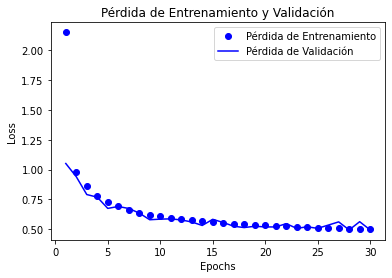

In [40]:
pinta_perdida_entrenamiento_validacion(historia3)

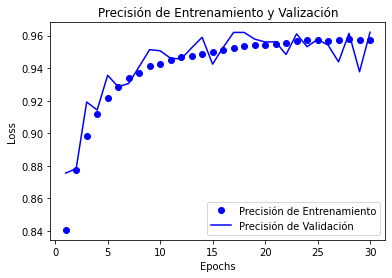

In [41]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Dropout

In [42]:
network4 = crea_modelo(4)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [43]:
network4 = compila_modelo(network4)

In [44]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3461 - accuracy: 0.8996 - val_loss: 0.1643 - val_accuracy: 0.9519
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1719 - accuracy: 0.9487 - val_loss: 0.1199 - val_accuracy: 0.9655
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1284 - accuracy: 0.9615 - val_loss: 0.0973 - val_accuracy: 0.9728
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1057 - accuracy: 0.9683 - val_loss: 0.0912 - val_accuracy: 0.9732
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0916 - accuracy: 0.9722 - val_loss: 0.0833 - val_accuracy: 0.9766
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0832 - accuracy: 0.9761 - val_loss: 0.0795 - val_accuracy: 0.9786
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.0789 - val_accuracy: 0.9769
Epoch 

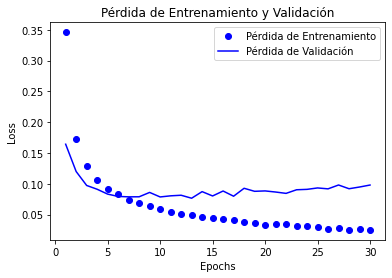

In [45]:
pinta_perdida_entrenamiento_validacion(historia4)

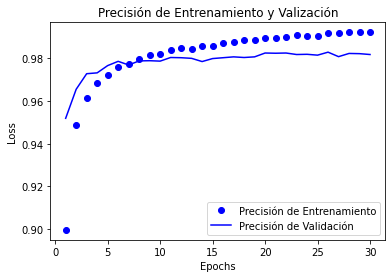

In [46]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [47]:
network5 = crea_modelo(5)

Error


ValueError: ignored

### CONCLUSIONES

Regularizador: Evita que se genere sobrentrenamiento, es por eso que nos vamos a fijar principalmente en la segunda gráfica es decir en la gráfica de precisión de entrenamiento y validación.

No nos vamos a fijar en la pérdida de entrenamiento y validación porque al tener regularizadores pérdida vamos a tener siempre debido a que el sistema generaliza más.

Dividimos los casos según su regularizador ya sea l1, l2, l1_l2 o ninguno.

CASO 0: El primer caso que probamos no tiene ningún regularizador, esto nos ha dado como consecuencia que se haya generado sobreentrenamiento a partir de la 5 época (aprox).

CASO 1: Hemos aplicado el regularizadorl1 a nuestra capa dense. Este es el peor caso de todos debido a que se genera sobreentrenamiento desde una época muy temprana, es decir, la distancia entre la precisión de entrenamiento y la precisión de validación es notable en su generalidad, por eso podemos concluir que no es muy eficaz el regularizadorl1. 

CASO 2: Hemos aplicado el regularizadorl2 a nuestra capa dense. En este caso la precisión de entrenamiento y la precisión de validación van bastante ligadas hasta la épocas 9 donde nuestro modelo comienza a fallar (como se puede ver en la gráfica donde en la precisión de validación comienzan a ver picos a partir de esta época)

CASO 3: Ahora hemos aplicado el regularizadorl1_l2 a nuestro modelo.  
Es el regularizador que mejor funciona ya que como podemos ver en la gráfica los datos de validación son bastante parejos a los datos de entrenamiento por lo que se puede concluir que el regularizadorl1_l2 actúa correctamente.

Por tanto llegamos a la conclusión que el regularizadorl1_l2 es más óptimo que el regularizadorl1  regularizadorl2 ya que en los casos es los que aplicamos el regularizadorl1_l2 los datos que obtenemos nos dan un resultado más fiable que al aplicar al mismo modelo el regularizadorl1 o el regularizadorl2

Otras opciones para mejorar el funcionamiento de nuestro modelo seria probar a cambiar el dropout en el caso 4 o reducir el número de epocas para evitar el sobreentrenamiento. También se puede cambiar el optimizador aunque esto es menos eficaz que lo mencionado con anterioridad.
